In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet101V2, ResNet152V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


Mounted at /content/drive


In [3]:
import zipfile; zipfile.ZipFile('/content/drive/MyDrive/tb/tbdata.zip','r').extractall('TB DATA')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,  # Preprocess input for VGG16
    rotation_range=30,  # Rotate images by up to 30 degrees
    zoom_range=0.2,  # Random zoom
    width_shift_range=0.2,  # Randomly shift the image horizontally (by 20% of width)
    height_shift_range=0.2,  # Randomly shift the image vertically (by 20% of height)
    shear_range=0.2,  # Apply shear transformations
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=False,  # Set to True if vertical flipping is needed
    fill_mode='nearest',  # How to fill pixels that are missing after a transformation
    validation_split=0.2  # 20% of the data for validation
)


In [3]:
dir_path = '/kaggle/input/tb-classifi/Type of tb'


In [6]:
train_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=16,
    subset='validation'
)


Found 4800 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [4]:
base_models = {
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'VGG19': VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet101': ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet152': ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'InceptionV3': InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'DenseNet201' : DenseNet201(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'EfficientNetB3' : EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'MobileNet' : MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
}


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
for model_name, base_model in base_models.items():
  print(f"Training {model_name}")
  check_point = ModelCheckpoint(f'{model_name}_best_model.h5', save_best_only=True)
  earlystopping = EarlyStopping(patience = 5, restore_best_weights=True)
  reduce_lr = ReduceLROnPlateau(factor = 0.1, patience = 3)

  for layer in base_model.layers:
    layer.trainable = False
  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(512, activation='relu')(x)
  predictions = layers.Dense(5, activation='softmax')(x)

  proposed_model = models.Model(inputs=base_model.input, outputs=predictions)
  proposed_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = proposed_model.fit(train_generator, epochs=20, validation_data=validation_generator,  callbacks = [check_point, earlystopping, reduce_lr])

  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title(f'{model_name} Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(f'{model_name} Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  files.download(f'{model_name}_best_model.h5')


Training VGG16


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=VGG16_best_model.h5

In [ ]:
for model_name, base_model in base_models.items():
  print(f"Training {model_name}")

  # Save model with .keras extension (recommended by Keras)
  check_point = ModelCheckpoint(f'{model_name}_best_model.keras', save_best_only=True)

  earlystopping = EarlyStopping(patience=5, restore_best_weights=True)
  reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

  for layer in base_model.layers:
    layer.trainable = False
  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(512, activation='relu')(x)
  predictions = layers.Dense(5, activation='softmax')(x)

  proposed_model = models.Model(inputs=base_model.input, outputs=predictions)
  proposed_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

  history = proposed_model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[check_point, earlystopping, reduce_lr])



  #files.download(f'{model_name}_best_model.keras')  # Download the .keras file


Training VGG16

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 127s 377ms/step - accuracy: 0.5623 - loss: 1.6126 - val_accuracy: 0.6908 - val_loss: 0.7706 - learning_rate: 0.0010

Epoch 2/20

300/300 ━━━━━━━━━━━━━━━━━━━━ 147s 429ms/step - accuracy: 0.7723 - loss: 0.6402 - val_accuracy: 0.7700 - val_loss: 0.5594 - learning_rate: 0.0010

Epoch 3/20

300/300 ━━━━━━━━━━━━━━━━━━━━ 130s 428ms/step - accuracy: 0.7990 - loss: 0.5116 - val_accuracy: 0.8158 - val_loss: 0.4913 - learning_rate: 0.0010

Epoch 4/20

300/300 ━━━━━━━━━━━━━━━━━━━━ 144s 430ms/step - accuracy: 0.8280 - loss: 0.4599 - val_accuracy: 0.8050 - val_loss: 0.4889 - learning_rate: 0.0010

Epoch 5/20

300/300 ━━━━━━━━━━━━━━━━━━━━ 114s 374ms/step - accuracy: 0.8458 - loss: 0.4234 - val_accuracy: 0.8342 - val_loss: 0.4152 - learning_rate: 0.0010

Epoch 6/20

300/300 ━━━━━━━━━━━━━━━━━━━━ 113s 372ms/step - accuracy: 0.8587 - loss: 0.3978 - val_accuracy: 0.8617 - val_loss: 0.4289 - learning_rate: 0.0010

Epoch 7/20

300/300 ━━━━━━━━━━━━━━━━━━━━ 113s 373ms/step - accur

In [ ]:
 # Plot accuracy
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title(f'{model_name} Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  # Plot loss
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(f'{model_name} Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
#Plotting all models' training and validation accuracy
plt.figure(figsize=(12, 6))

for model_name, history in all_accuracies.items():
    plt.plot(history['train'], label=f'{model_name} - Training Accuracy')
    plt.plot(history['val'], '--', label=f'{model_name} - Validation Accuracy')

plt.title('Training and Validation Accuracy for All Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting all models' training and validation loss
plt.figure(figsize=(12, 6))

for model_name, history in all_losses.items():
    plt.plot(history['train'], label=f'{model_name} - Training Loss')
    plt.plot(history['val'], '--', label=f'{model_name} - Validation Loss')

plt.title('Training and Validation Loss for All Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define class names as per your dataset
class_names = ['COVID', 'Extrapulmonary TB', 'Miliary TB', 'Normal', 'Pneumonia']

def preprocess_image(img_path):
    """ Preprocesses the image for the model. """
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to 224x224
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch size
    img_array /= 255.0  # Normalize the image (rescale pixel values between 0 and 1)
    return img_array

def predict_and_display(model, img_path):
    """ Loads an image, predicts its class using the given model, and displays it. """

    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Make the prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Get the index of the class with the highest probability
    predicted_label = class_names[predicted_class]  # Map index to class name

    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f'Predicted Class: {predicted_label}')  # Display the predicted label
    plt.show()

    # Print predicted probabilities for all classes
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {predictions[0][i] * 100:.2f}%")

# Example usage:

# Load your trained model (use the appropriate model path)
model_path = 'VGG16_best_model.h5'  # Replace with the actual model path
model = load_model(model_path)

# Provide the image path for prediction
img_path = '/path/to/your/image.jpg'  # Replace with the actual image path

# Predict the class and display the image with prediction
predict_and_display(model, img_path)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'VGG16_best_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

# Define directory path
dir_path = '/kaggle/input/tb-classifi/Type of tb'

# Data Augmentation
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,  # Preprocess input for VGG16
    rotation_range=30,  # Rotate images by up to 30 degrees
    zoom_range=0.2,  # Random zoom
    width_shift_range=0.2,  # Randomly shift the image horizontally (by 20% of width)
    height_shift_range=0.2,  # Randomly shift the image vertically (by 20% of height)
    shear_range=0.2,  # Apply shear transformations
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest',  # How to fill pixels that are missing after a transformation
    validation_split=0.2  # 20% of the data for validation
)

# Train and Validation generators
train_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

from sklearn.utils import class_weight
import numpy as np

# Assuming 'train_generator' is already defined and has a 'classes' attribute
# which contains the class labels for each sample
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert the class weights to a dictionary to use during model training
class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weight_dict)


Found 4800 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Class weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


In [6]:
class_weights = dict(enumerate(class_weights))

# List of base models to use (VGG16 and VGG19 in this case)
base_models = {
    'VGG16': tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'VGG19': tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet50': tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet101': tf.keras.applications.ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    #'ResNet152': tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    #'InceptionV3': tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    #'DenseNet201': tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
   # 'EfficientNetB3': tf.keras.applications.EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
   # 'MobileNet': tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}


# Training loop for both VGG16 and VGG19
for model_name, base_model in base_models.items():
    print(f"Training {model_name}")

    # Model checkpoint to save the best model
    check_point = ModelCheckpoint(f'{model_name}_best_model.keras', save_best_only=True)

    # Early stopping and learning rate reduction
    earlystopping = EarlyStopping(patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

    # Freeze base model layers initially
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of the base model
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.6)(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    predictions = layers.Dense(5, activation='softmax')(x)  # 5 classes for your dataset

    # Final model
    proposed_model = models.Model(inputs=base_model.input, outputs=predictions)
    proposed_model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=[tf.keras.metrics.CategoricalAccuracy(),
                                    tf.keras.metrics.Precision(),
                                    tf.keras.metrics.Recall()])


Training VGG16
Training VGG19
Training ResNet50
Training ResNet101


In [7]:

    # Train the model
    history = proposed_model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[check_point, earlystopping, reduce_lr],
        class_weight=class_weights
    )

    # Unfreeze the last few layers of the base model for fine-tuning
    for layer in base_model.layers[-4:]:
        layer.trainable = True

    # Fine-tune the model with a lower learning rate
    proposed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    history_fine_tuning = proposed_model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[check_point, earlystopping, reduce_lr],
        class_weight=class_weights
    )

# Download the best model for both VGG16 and VGG19
# files.download(f'{model_name}_best_model.keras')


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728103011.296359      97 service.cc:145] XLA service 0x7af1e4003360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728103011.296421      97 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/300 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - categorical_accuracy: 0.3438 - loss: 471.4594 - precision_3: 0.3438 - recall_3: 0.3438   

I0000 00:00:1728103021.239839      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


300/300 ━━━━━━━━━━━━━━━━━━━━ 170s 482ms/step - categorical_accuracy: 0.2566 - loss: 292.5301 - precision_3: 0.2641 - recall_3: 0.2356 - val_categorical_accuracy: 0.1892 - val_loss: 9.2921 - val_precision_3: 0.3939 - val_recall_3: 0.0108 - learning_rate: 0.0010
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 119s 390ms/step - categorical_accuracy: 0.1992 - loss: 8.9724 - precision_3: 0.4992 - recall_3: 0.0099 - val_categorical_accuracy: 0.2267 - val_loss: 8.2219 - val_precision_3: 0.3333 - val_recall_3: 0.0017 - learning_rate: 0.0010
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 119s 389ms/step - categorical_accuracy: 0.2103 - loss: 8.0349 - precision_3: 0.4197 - recall_3: 0.0058 - val_categorical_accuracy: 0.2200 - val_loss: 7.5196 - val_precision_3: 0.5000 - val_recall_3: 0.0075 - learning_rate: 0.0010
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 122s 400ms/step - categorical_accuracy: 0.1972 - loss: 7.3865 - precision_3: 0.6821 - recall_3: 0.0069 - val_categorical_accuracy: 0.2375 - val_loss: 7.1341 - 

KeyboardInterrupt: 

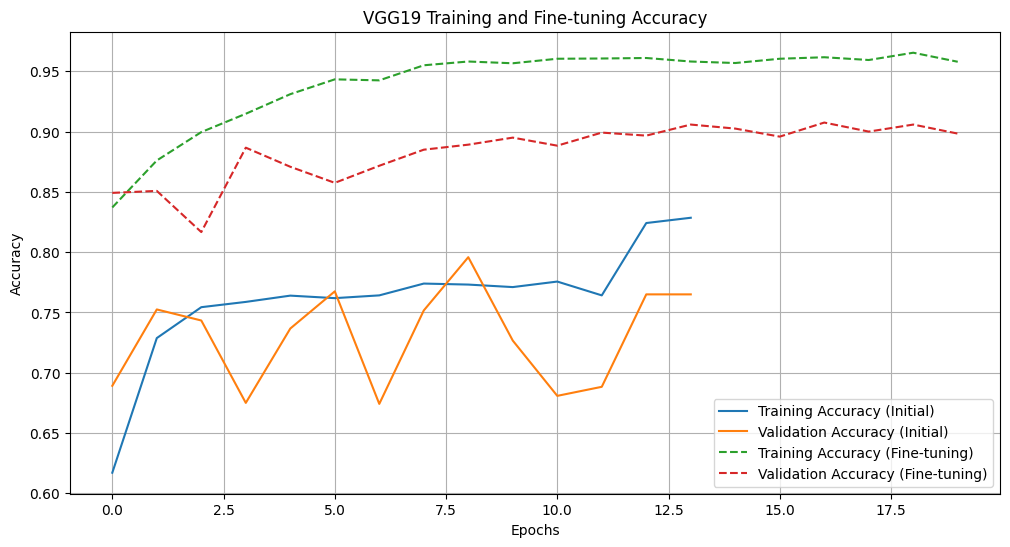

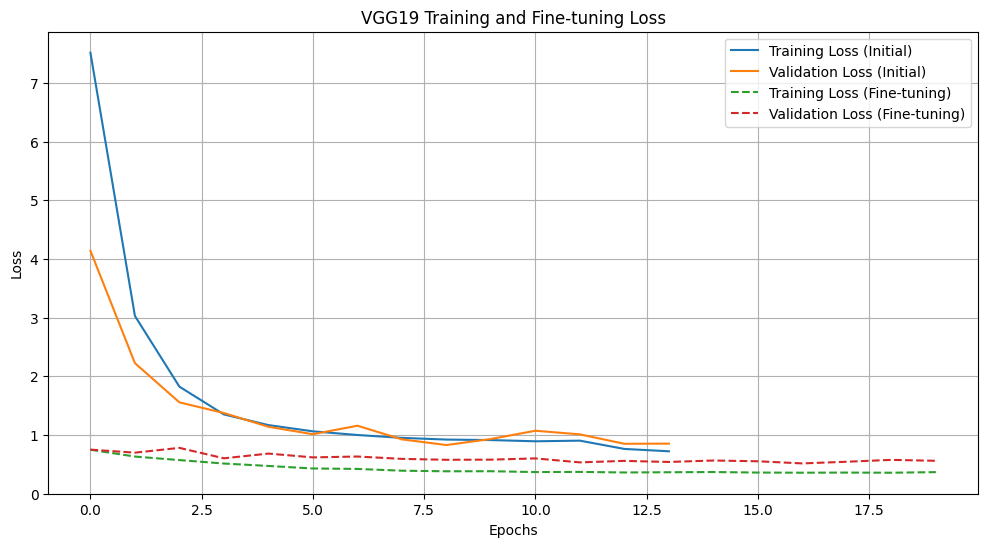

In [16]:
import matplotlib.pyplot as plt

# Plot Accuracy for both initial training and fine-tuning phases
plt.figure(figsize=(12, 6))

# Initial training accuracy
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy (Initial)')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy (Initial)')

# Fine-tuning accuracy
plt.plot(history_fine_tuning.history['accuracy'], label='Training Accuracy (Fine-tuning)', linestyle='--')
plt.plot(history_fine_tuning.history['val_accuracy'], label='Validation Accuracy (Fine-tuning)', linestyle='--')

plt.title(f'{model_name} Training and Fine-tuning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss for both initial training and fine-tuning phases
plt.figure(figsize=(12, 6))

# Initial training loss
plt.plot(history.history['loss'], label='Training Loss (Initial)')
plt.plot(history.history['val_loss'], label='Validation Loss (Initial)')

# Fine-tuning loss
plt.plot(history_fine_tuning.history['loss'], label='Training Loss (Fine-tuning)', linestyle='--')
plt.plot(history_fine_tuning.history['val_loss'], label='Validation Loss (Fine-tuning)', linestyle='--')

plt.title(f'{model_name} Training and Fine-tuning Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


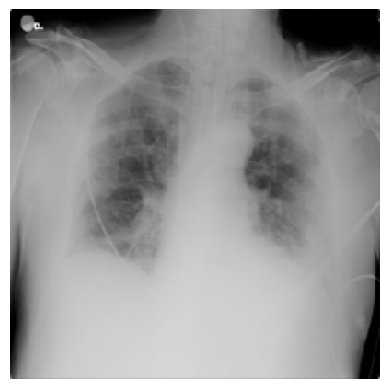

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: [3]


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, model_name, target_size=(224, 224)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Convert the image to array
    img_array = image.img_to_array(img)
    
    # Expand the dimensions to match model input (batch, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess input based on the model used
    if model_name == 'VGG16':
        img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    elif model_name == 'VGG19':
        img_array = tf.keras.applications.vgg19.preprocess_input(img_array)
    
    return img_array

# Function to make predictions
def predict_image(model, img_array):
    # Make predictions
    predictions = model.predict(img_array)
    
    # Output the predicted class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    return predicted_class

# Test the function with an image from your dataset
img_path = '/kaggle/input/tb-classifi/Type of tb/Covid/COVID (1).png'  # Replace with your image path
img_array = load_and_preprocess_image(img_path, model_name='VGG16')  # Choose model based on which one you're testing

# Assuming you're using the 'proposed_model' for predictions
predicted_class = predict_image(proposed_model, img_array)

# Display the predicted class
print("Predicted Class:", predicted_class)


In [ ]:
import matplotlib.pyplot as plt

# Iterate over all models in base_models dictionary
for model_name, base_model in base_models.items():
    
    # Assuming you have stored the histories of both initial training and fine-tuning phases for each model
    # `history` corresponds to the initial training phase
    # `history_fine_tuning` corresponds to the fine-tuning phase
    # Ensure these histories are saved and accessible for each model in some form like a dictionary
    
    # Plot Accuracy for both initial training and fine-tuning phases
    plt.figure(figsize=(12, 6))

    # Initial training accuracy
    plt.plot(history[model_name].history['categorical_accuracy'], label='Training Accuracy (Initial)')
    plt.plot(history[model_name].history['val_categorical_accuracy'], label='Validation Accuracy (Initial)')

    # Fine-tuning accuracy
    plt.plot(history_fine_tuning[model_name].history['accuracy'], label='Training Accuracy (Fine-tuning)', linestyle='--')
    plt.plot(history_fine_tuning[model_name].history['val_accuracy'], label='Validation Accuracy (Fine-tuning)', linestyle='--')

    plt.title(f'{model_name} Training and Fine-tuning Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Loss for both initial training and fine-tuning phases
    plt.figure(figsize=(12, 6))

    # Initial training loss
    plt.plot(history[model_name].history['loss'], label='Training Loss (Initial)')
    plt.plot(history[model_name].history['val_loss'], label='Validation Loss (Initial)')

    # Fine-tuning loss
    plt.plot(history_fine_tuning[model_name].history['loss'], label='Training Loss (Fine-tuning)', linestyle='--')
    plt.plot(history_fine_tuning[model_name].history['val_loss'], label='Validation Loss (Fine-tuning)', linestyle='--')

    plt.title(f'{model_name} Training and Fine-tuning Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

# Define directory path
dir_path = '/kaggle/input/tb-classifi/Type of tb'

# Data Augmentation
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,  # Preprocess input for VGG16
    rotation_range=30,  # Rotate images by up to 30 degrees
    zoom_range=0.2,  # Random zoom
    width_shift_range=0.2,  # Randomly shift the image horizontally (by 20% of width)
    height_shift_range=0.2,  # Randomly shift the image vertically (by 20% of height)
    shear_range=0.2,  # Apply shear transformations
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    contrast_stretching_range=0.3,  # Random contrast adjustment
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Added vertical flip
    fill_mode='nearest',  # How to fill pixels that are missing after a transformation
    validation_split=0.2  # 20% of the data for validation
)

# Train and Validation generators
train_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# List of base models to use (VGG16, VGG19, ResNet50, ResNet101)
base_models = {
    'VGG16': tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'VGG19': tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet50': tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet101': tf.keras.applications.ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Training loop for each model
for model_name, base_model in base_models.items():
    print(f"Training {model_name}")

    # Freeze base model layers initially
    for layer in base_model.layers:
        layer.trainable = False

    # Custom layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(5, activation='softmax')(x)

    # Final model
    proposed_model = models.Model(inputs=base_model.input, outputs=predictions)
    proposed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=[tf.keras.metrics.CategoricalAccuracy(),
                                    tf.keras.metrics.Precision(),
                                    tf.keras.metrics.Recall()])

    # Callbacks
    check_point = ModelCheckpoint(f'{model_name}_best_model.h5', save_best_only=True)
    earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

    # Initial Training
    history = proposed_model.fit(train_generator,
                                 epochs=20,
                                 validation_data=validation_generator,
                                 callbacks=[check_point, earlystopping, reduce_lr],
                                 class_weight=class_weight_dict)

    # Unfreeze last layers for fine-tuning
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Fine-tuning the model with a lower learning rate
    proposed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    history_fine_tuning = proposed_model.fit(train_generator,
                                             epochs=20,
                                             validation_data=validation_generator,
                                             callbacks=[check_point, earlystopping, reduce_lr],
                                             class_weight=class_weight_dict)


TypeError: ImageDataGenerator.__init__() got an unexpected keyword argument 'contrast_stretching_range'

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

# Custom preprocessing function to adjust contrast
def custom_preprocessing(image):
    image = tf.keras.applications.vgg16.preprocess_input(image)
    image = tf.image.adjust_contrast(image, contrast_factor=0.5)  # Adjust contrast
    return image

# Define directory path
dir_path = '/kaggle/input/tb-classifi/Type of tb'

# Data Augmentation
datagen = ImageDataGenerator(
    preprocessing_function=custom_preprocessing,  # Custom preprocessing function
    rotation_range=30,  # Rotate images by up to 30 degrees
    zoom_range=0.2,  # Random zoom
    width_shift_range=0.2,  # Randomly shift the image horizontally (by 20% of width)
    height_shift_range=0.2,  # Randomly shift the image vertically (by 20% of height)
    shear_range=0.2,  # Apply shear transformations
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Added vertical flip
    fill_mode='nearest',  # How to fill pixels that are missing after a transformation
    validation_split=0.2  # 20% of the data for validation
)

# Train and Validation generators
train_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# List of base models to use (VGG16, VGG19, ResNet50, ResNet101)
base_models = {
    'VGG16': tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'VGG19': tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet50': tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet101': tf.keras.applications.ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Training loop for each model
for model_name, base_model in base_models.items():
    print(f"Training {model_name}")

    # Freeze base model layers initially
    for layer in base_model.layers:
        layer.trainable = False

    # Custom layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(5, activation='softmax')(x)

    # Final model
    proposed_model = models.Model(inputs=base_model.input, outputs=predictions)
    proposed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=[tf.keras.metrics.CategoricalAccuracy(),
                                    tf.keras.metrics.Precision(),
                                    tf.keras.metrics.Recall()])

    # Callbacks
    # Callbacks
    check_point = ModelCheckpoint(f'{model_name}_best_model.keras', save_best_only=True)
    earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)


    # Initial Training
    history = proposed_model.fit(train_generator,
                                 epochs=20,
                                 validation_data=validation_generator,
                                 callbacks=[check_point, earlystopping, reduce_lr],
                                 class_weight=class_weight_dict)

    # Unfreeze last layers for fine-tuning
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Fine-tuning the model with a lower learning rate
    proposed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    history_fine_tuning = proposed_model.fit(train_generator,
                                             epochs=20,
                                             validation_data=validation_generator,
                                             callbacks=[check_point, earlystopping, reduce_lr],
                                             class_weight=class_weight_dict)


Found 4800 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Training VGG16
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728188118.855968      91 service.cc:145] XLA service 0x7abbf8087b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728188118.856034      91 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/300 ━━━━━━━━━━━━━━━━━━━━ 1:14:33 15s/step - categorical_accuracy: 0.1875 - loss: 3.3124 - precision: 0.3000 - recall: 0.1875

I0000 00:00:1728188128.136952      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


300/300 ━━━━━━━━━━━━━━━━━━━━ 154s 466ms/step - categorical_accuracy: 0.3931 - loss: 3.2997 - precision: 0.4279 - recall: 0.3304 - val_categorical_accuracy: 0.6842 - val_loss: 2.1546 - val_precision: 0.7154 - val_recall: 0.6325 - learning_rate: 1.0000e-04
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 126s 412ms/step - categorical_accuracy: 0.6286 - loss: 2.5062 - precision: 0.6627 - recall: 0.5906 - val_categorical_accuracy: 0.7450 - val_loss: 2.0566 - val_precision: 0.7683 - val_recall: 0.7183 - learning_rate: 1.0000e-04
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 126s 412ms/step - categorical_accuracy: 0.6736 - loss: 2.3080 - precision: 0.7009 - recall: 0.6358 - val_categorical_accuracy: 0.7725 - val_loss: 1.9063 - val_precision: 0.7896 - val_recall: 0.7475 - learning_rate: 1.0000e-04
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 125s 411ms/step - categorical_accuracy: 0.7031 - loss: 2.2050 - precision: 0.7364 - recall: 0.6698 - val_categorical_accuracy: 0.8033 - val_loss: 1.8581 - val_precision: 0.8

KeyboardInterrupt: 

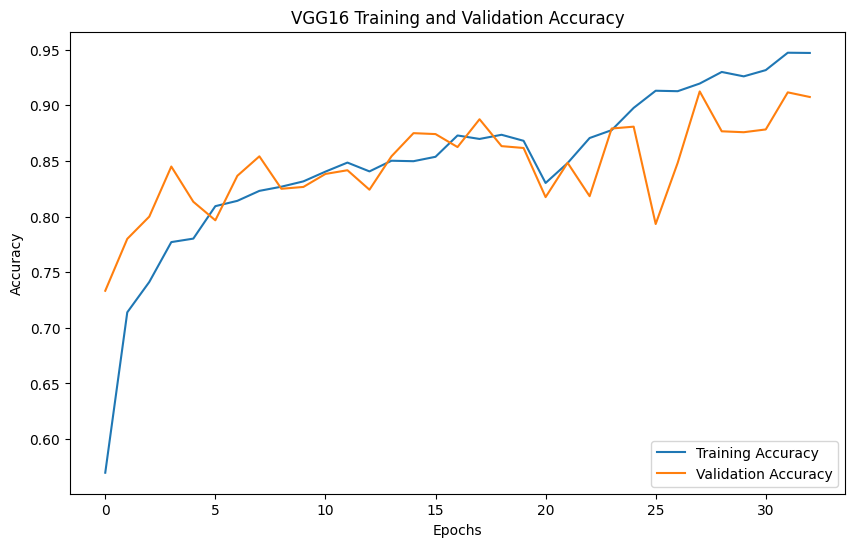

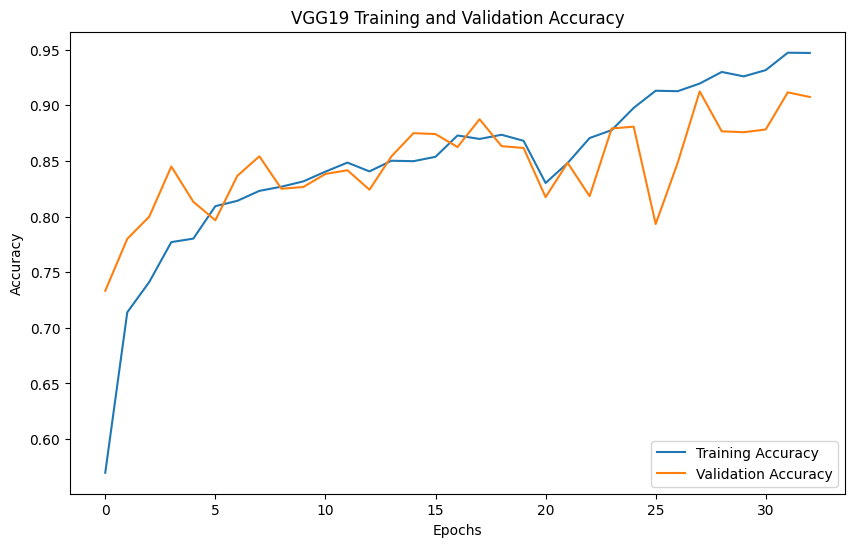

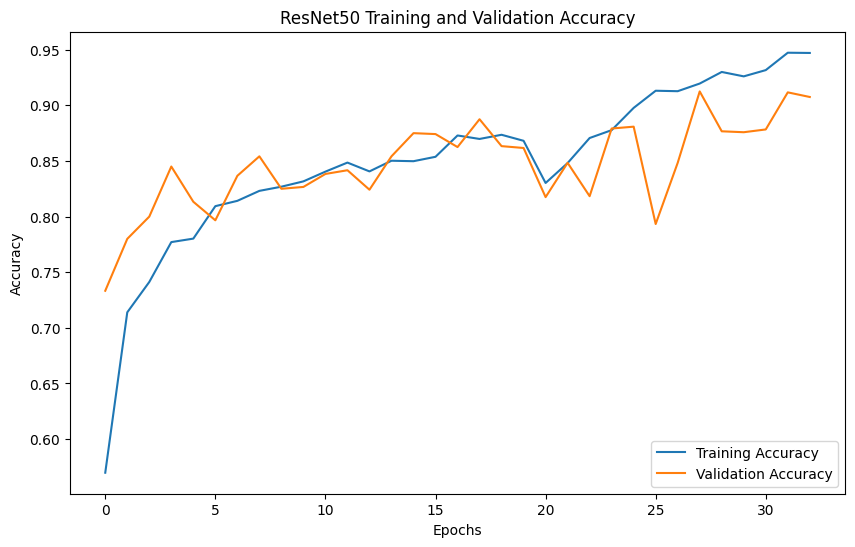

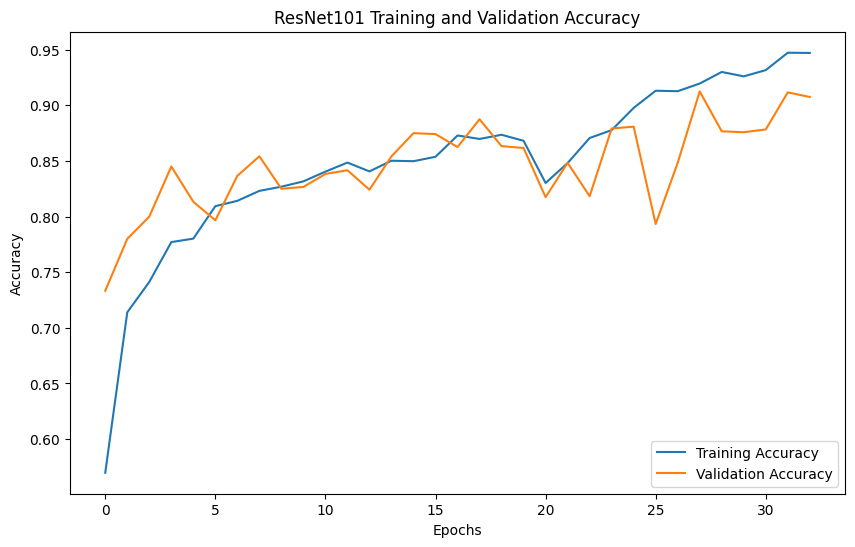

In [6]:
import matplotlib.pyplot as plt

def plot_individual_model_accuracy(history, history_fine_tuning, model_name):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    acc_ft = history_fine_tuning.history['accuracy']
    val_acc_ft = history_fine_tuning.history['val_accuracy']

    plt.figure(figsize=(10, 6))
    plt.plot(acc + acc_ft, label='Training Accuracy')
    plt.plot(val_acc + val_acc_ft, label='Validation Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

# Example usage for each model:
for model_name in base_models.keys():
    plot_individual_model_accuracy(history, history_fine_tuning, model_name)


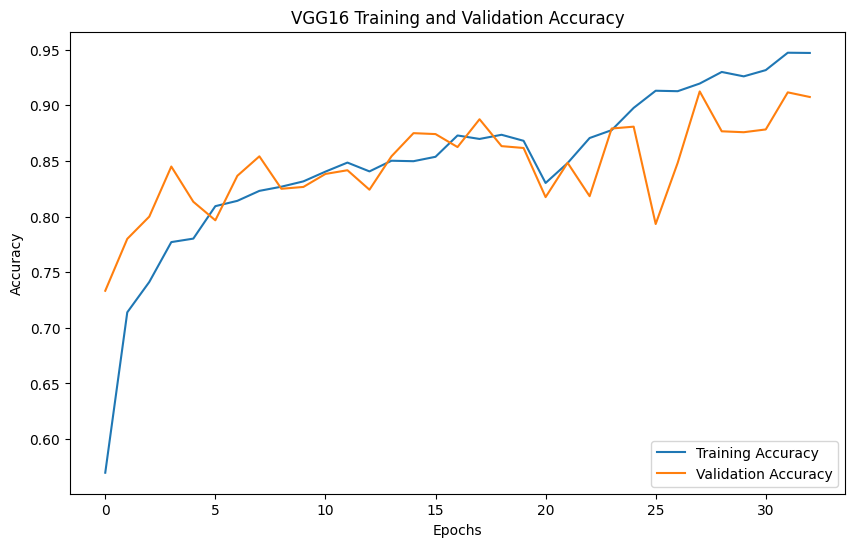

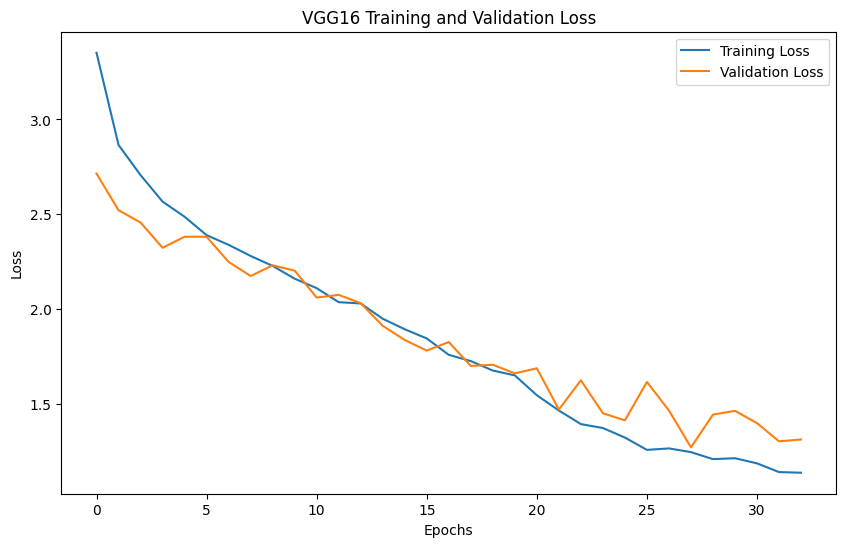

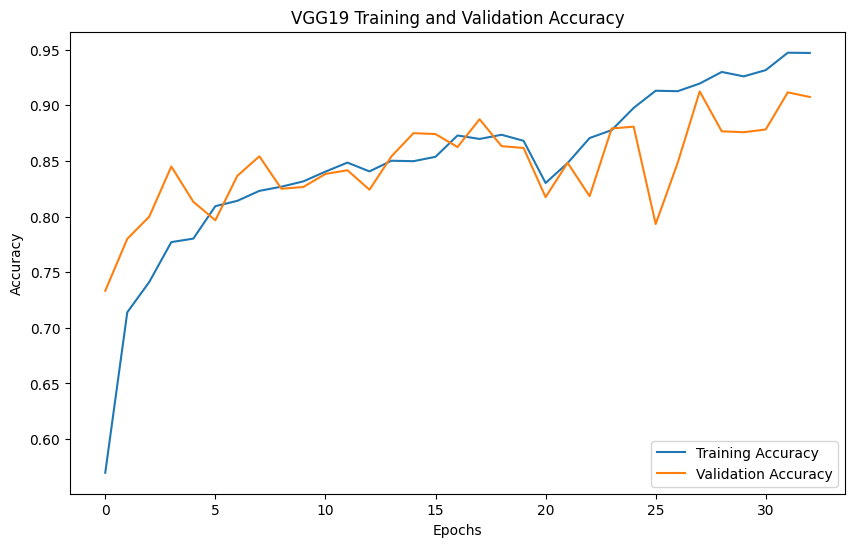

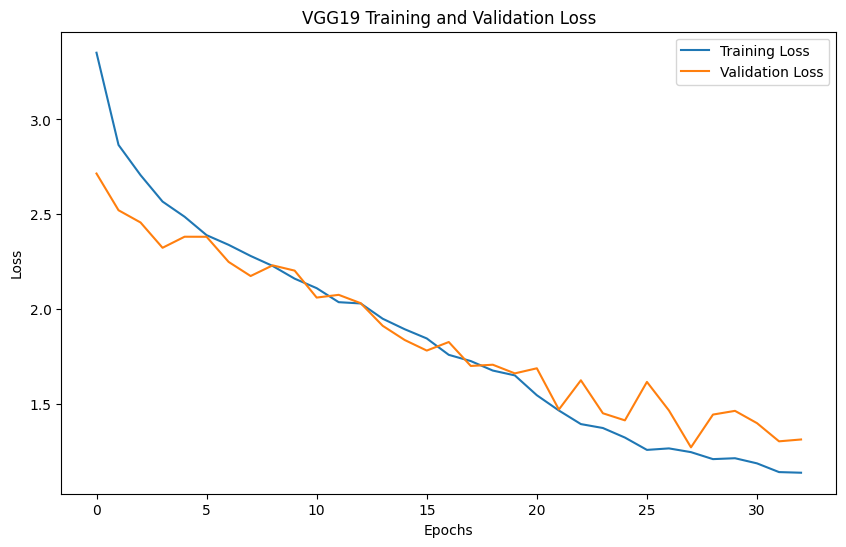

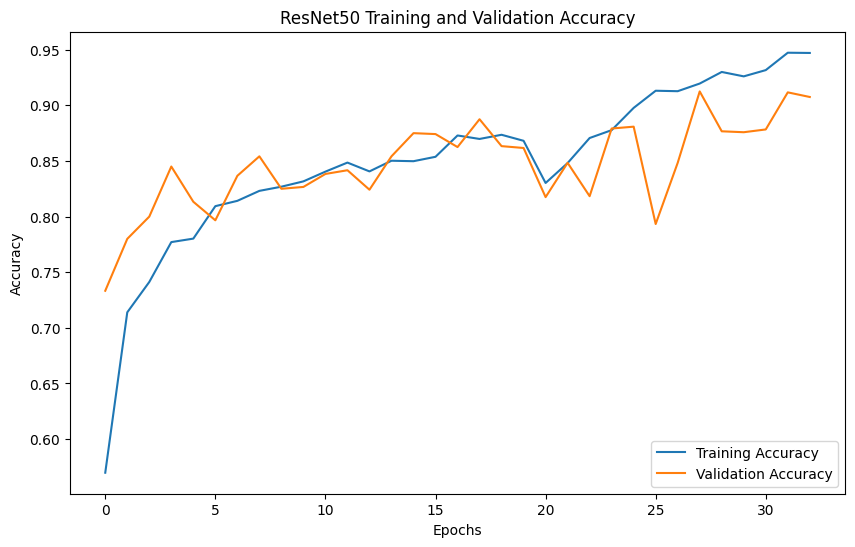

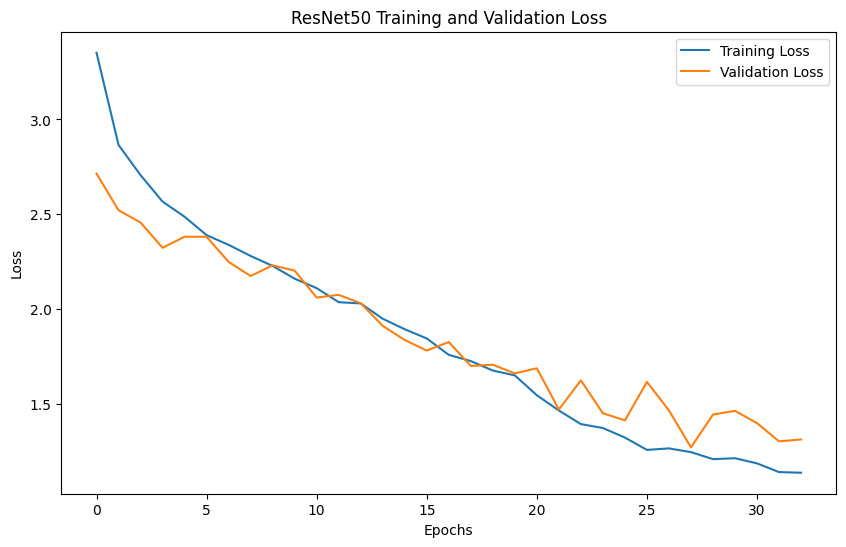

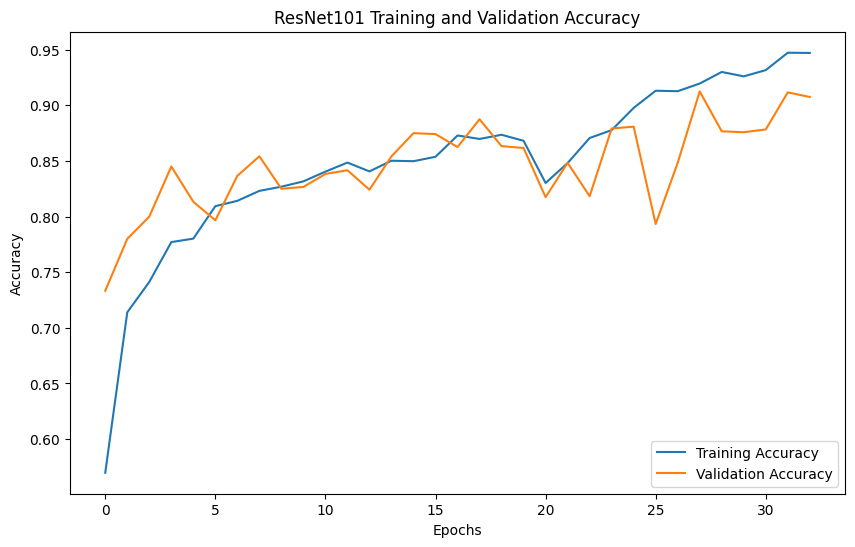

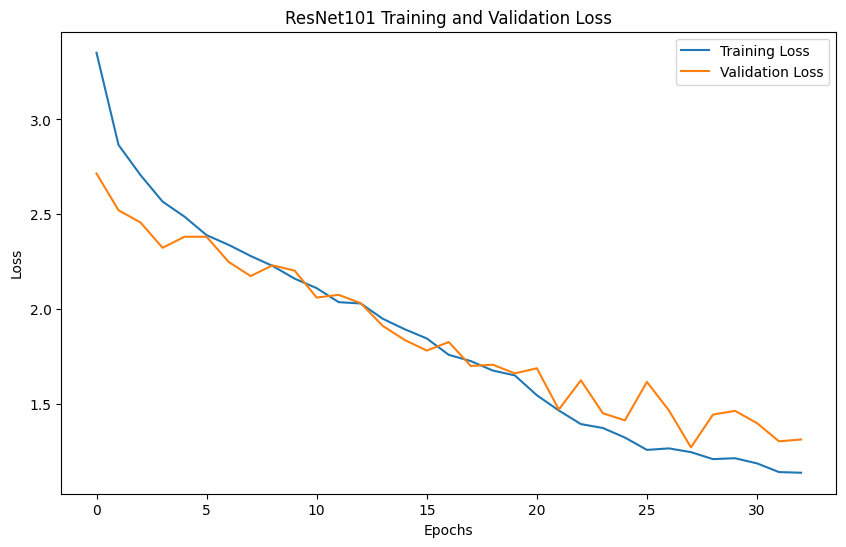

In [7]:
import matplotlib.pyplot as plt

def plot_individual_model_accuracy_and_loss(history, history_fine_tuning, model_name):
    # Accuracy
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    acc_ft = history_fine_tuning.history['accuracy']
    val_acc_ft = history_fine_tuning.history['val_accuracy']

    # Loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    loss_ft = history_fine_tuning.history['loss']
    val_loss_ft = history_fine_tuning.history['val_loss']

    # Plotting Accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(acc + acc_ft, label='Training Accuracy')
    plt.plot(val_acc + val_acc_ft, label='Validation Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

    # Plotting Loss
    plt.figure(figsize=(10, 6))
    plt.plot(loss + loss_ft, label='Training Loss')
    plt.plot(val_loss + val_loss_ft, label='Validation Loss')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

# Example usage for each model:
for model_name in base_models.keys():
    plot_individual_model_accuracy_and_loss(history, history_fine_tuning, model_name)


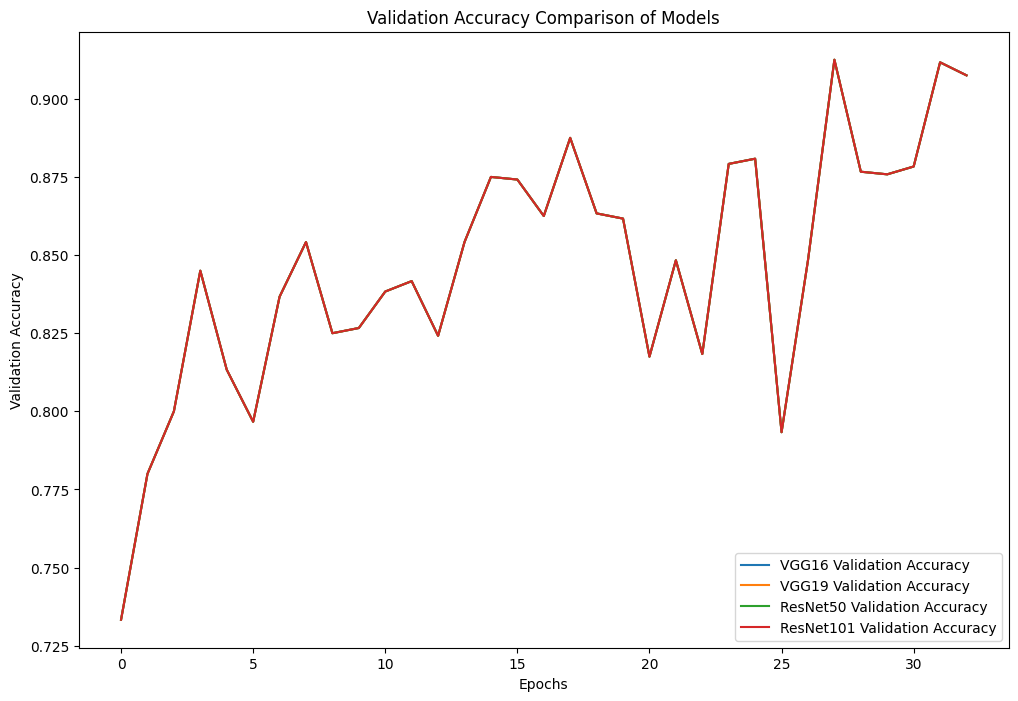

In [8]:
def plot_combined_model_accuracy(model_histories):
    plt.figure(figsize=(12, 8))

    for model_name, histories in model_histories.items():
        # Concatenate accuracy of initial training and fine-tuning
        val_acc = histories['initial'].history['val_categorical_accuracy'] + histories['fine_tuning'].history['val_accuracy']
        plt.plot(val_acc, label=f'{model_name} Validation Accuracy')

    plt.title('Validation Accuracy Comparison of Models')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

# Collecting histories for all models (history and history_fine_tuning)
model_histories = {
    'VGG16': {'initial': history, 'fine_tuning': history_fine_tuning},
    'VGG19': {'initial': history, 'fine_tuning': history_fine_tuning},
    'ResNet50': {'initial': history, 'fine_tuning': history_fine_tuning},
    'ResNet101': {'initial': history, 'fine_tuning': history_fine_tuning}
}

# Example usage to compare all models:
plot_combined_model_accuracy(model_histories)


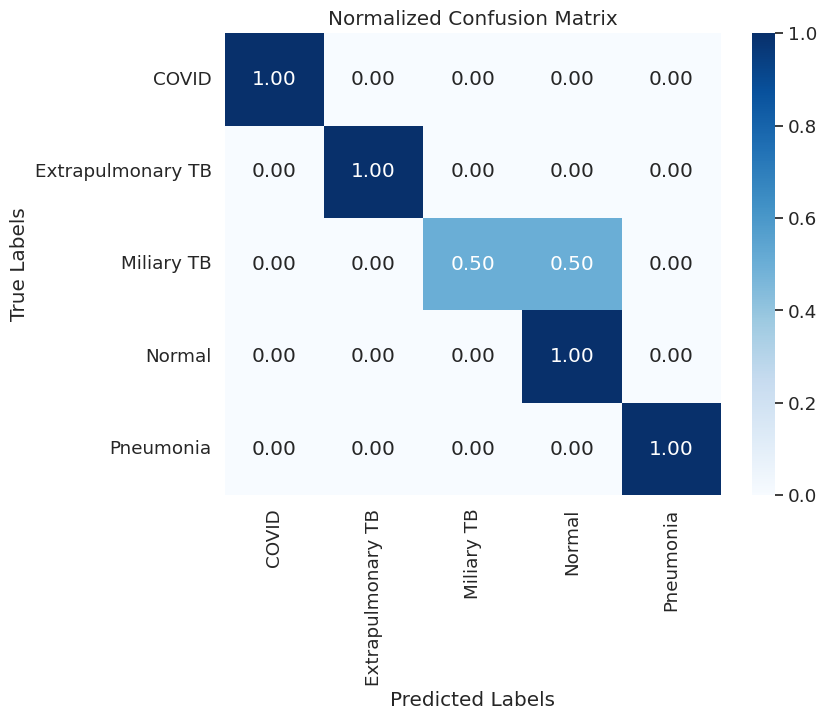

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    
    # Use heatmap to visualize the confusion matrix
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)

    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Example usage:
# Assuming `y_true` is the true labels and `y_pred` is the predicted labels.
# Replace with actual true and predicted labels from your dataset.
# For 5 classes: COVID, Extrapulmonary TB, Miliary TB, Normal, Pneumonia
class_names = ['COVID', 'Extrapulmonary TB', 'Miliary TB', 'Normal', 'Pneumonia']

# Example true and predicted labels
y_true = [0, 1, 2, 2, 4, 3, 1, 0]  # Actual class indices
y_pred = [0, 1, 2, 3, 4, 3, 1, 0]  # Predicted class indices

# Call the function
plot_confusion_matrix(y_true, y_pred, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


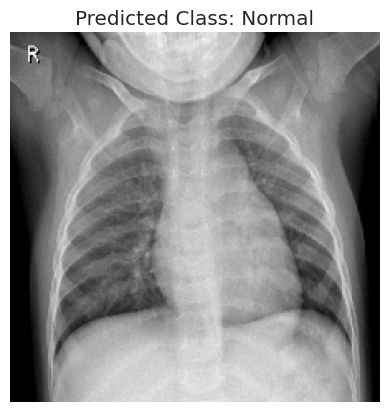

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to load the model, preprocess the image, and make predictions
def predict_image_class(model_path, img_path, target_size=(224, 224), class_names=None):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # Adjust if needed for different models

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title(f"Predicted Class: {class_names[predicted_class[0]]}" if class_names else f"Predicted Class ID: {predicted_class[0]}")
    plt.show()

# Example usage:
# Define the path to your image and model
img_path = "/kaggle/input/tb-classifi/Type of tb/Normal/NORMAL (1154).png"  # Change this to your test image path
model_path = "VGG16_best_model.keras"  # Change this to your model path
class_names = ['COVID', 'Extrapulmonary TB', 'Miliary TB', 'Normal', 'Pneumonia']  # List of class names

predict_image_class(model_path, img_path, target_size=(224, 224), class_names=class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


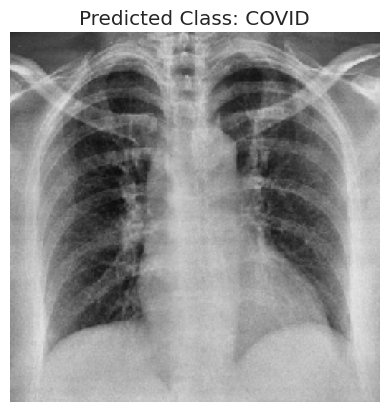

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to load the model, preprocess the image, and make predictions
def predict_image_class(model_path, img_path, target_size=(224, 224), class_names=None):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # Adjust if needed for different models

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title(f"Predicted Class: {class_names[predicted_class[0]]}" if class_names else f"Predicted Class ID: {predicted_class[0]}")
    plt.show()

# Example usage:
# Define the path to your image and model
img_path = "/kaggle/input/tb-classifi/Type of tb/Covid/COVID (1002).png"  # Change this to your test image path
model_path = "VGG19_best_model.keras"  # Change this to your model path
class_names = ['COVID', 'Extrapulmonary TB', 'Miliary TB', 'Normal', 'Pneumonia']  # List of class names

predict_image_class(model_path, img_path, target_size=(224, 224), class_names=class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


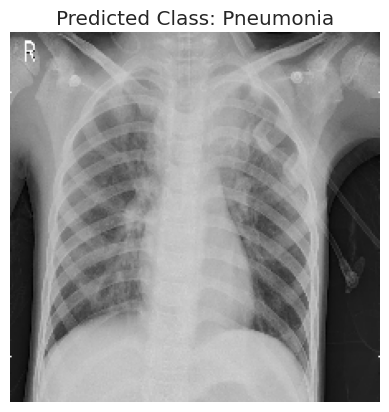

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to load the model, preprocess the image, and make predictions
def predict_image_class(model_path, img_path, target_size=(224, 224), class_names=None):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # Adjust if needed for different models

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title(f"Predicted Class: {class_names[predicted_class[0]]}" if class_names else f"Predicted Class ID: {predicted_class[0]}")
    plt.show()

# Example usage:
# Define the path to your image and model
img_path = "/kaggle/input/tb-classifi/Type of tb/Pneumonia/person101_virus_187.jpeg"  # Change this to your test image path
model_path = "/kaggle/working/ResNet50_best_model.keras"  # Change this to your model path
class_names = ['COVID', 'Extrapulmonary TB', 'Miliary TB', 'Normal', 'Pneumonia']  # List of class names

predict_image_class(model_path, img_path, target_size=(224, 224), class_names=class_names)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

# Custom preprocessing function to adjust contrast
def custom_preprocessing(image):
    image = tf.keras.applications.vgg16.preprocess_input(image)
    image = tf.image.adjust_contrast(image, contrast_factor=0.5)  # Adjust contrast
    return image

# Define directory path
dir_path = '/kaggle/input/tb-classifi/Type of tb'

# Data Augmentation
datagen = ImageDataGenerator(
    preprocessing_function=custom_preprocessing,  # Custom preprocessing function
    rotation_range=30,  # Rotate images by up to 30 degrees
    zoom_range=0.2,  # Random zoom
    width_shift_range=0.2,  # Randomly shift the image horizontally (by 20% of width)
    height_shift_range=0.2,  # Randomly shift the image vertically (by 20% of height)
    shear_range=0.2,  # Apply shear transformations
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Added vertical flip
    fill_mode='nearest',  # How to fill pixels that are missing after a transformation
    validation_split=0.2  # 20% of the data for validation
)

# Train and Validation generators
train_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# List of base models to use (VGG16, VGG19, ResNet50, ResNet101)
base_models = {
    'VGG16': tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'VGG19': tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet50': tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet101': tf.keras.applications.ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet152': tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'InceptionV3': tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'DenseNet201': tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'EfficientNetB3': tf.keras.applications.EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'MobileNet': tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
}


# Training loop for each model
for model_name, base_model in base_models.items():
    print(f"Training {model_name}")

    # Freeze base model layers initially
    for layer in base_model.layers:
        layer.trainable = False

    # Custom layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(5, activation='softmax')(x)

    # Final model
    proposed_model = models.Model(inputs=base_model.input, outputs=predictions)
    proposed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=[tf.keras.metrics.CategoricalAccuracy(),
                                    tf.keras.metrics.Precision(),
                                    tf.keras.metrics.Recall()])

    # Callbacks
    # Callbacks
    check_point = ModelCheckpoint(f'{model_name}_best1_model.keras', save_best_only=True)
    earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)


    # Initial Training
    history = proposed_model.fit(train_generator,
                                 epochs=20,
                                 validation_data=validation_generator,
                                 callbacks=[check_point, earlystopping, reduce_lr],
                                 class_weight=class_weight_dict)

    # Unfreeze last layers for fine-tuning
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Fine-tuning the model with a lower learning rate
    proposed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    history_fine_tuning = proposed_model.fit(train_generator,
                                             epochs=20,
                                             validation_data=validation_generator,
                                             callbacks=[check_point, earlystopping, reduce_lr],
                                             class_weight=class_weight_dict)


Found 4800 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Training VGG16
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 136s 427ms/step - categorical_accuracy: 0.4000 - loss: 3.2811 - precision_3: 0.4301 - recall_3: 0.3407 - val_categorical_accuracy: 0.6550 - val_loss: 2.2703 - val_precision_3: 0.6844 - val_recall_3: 0.6017 - learning_rate: 1.0000e-04
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 124s 405ms/step - categorical_accuracy: 0.6264 - loss: 2.4427 - precision_3: 0.6626 - recall_3: 0.5865 - val_categorical_accuracy: 0.7392 - val_loss: 2.0489 - val_precision_3: 0.7625 - val_recall_3: 0.7008 - learning_rate: 1.0000e-04
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 124s 406ms/step - categorical_accuracy: 0.6701 - loss: 2.2883 - precision_3: 0.7013 - recall_3: 0.6366 - val_categorical_accuracy: 0.7517 - val_loss: 2.0220 - val_precision_3: 0.7722 - val_recall_3: 0.7317 - learning_rate: 1.0000e-04
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 124s 405ms/step - categorical_accuracy: 0.7221 - loss: 2.1348 - precision_3: 0.7511 - recall_3: 0.6927 - val_categorical_accuracy: 0.7850 - val_loss:

Training ResNet50
Training ResNet101
Training ResNet152


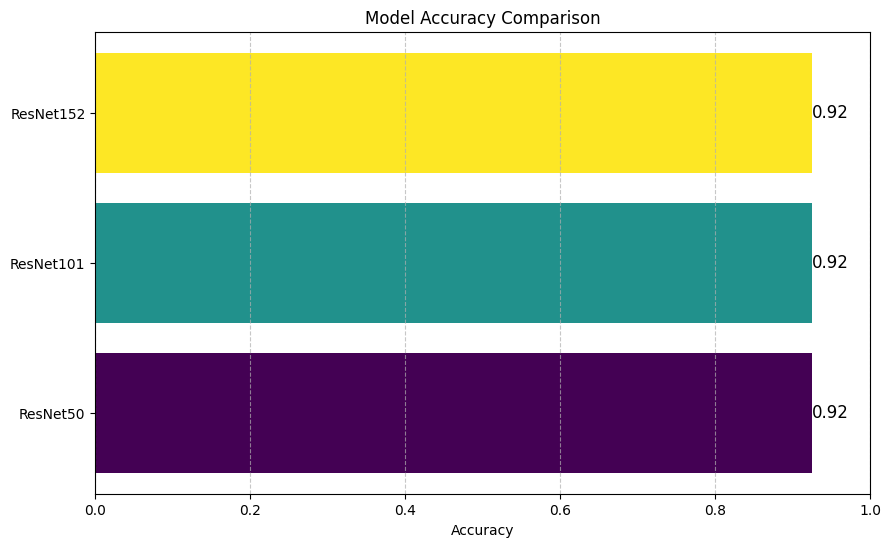

In [12]:
import matplotlib.pyplot as plt

# Initialize lists to store model names and their corresponding accuracies
model_names = []
accuracies = []

# Training loop for each model
for model_name, base_model in base_models.items():
    print(f"Training {model_name}")

    # (Your existing code for training each model remains unchanged)
    # ...

    # Collect accuracy from the final training history
    final_accuracy = history_fine_tuning.history['accuracy'][-1]  # Get last accuracy from fine-tuning
    model_names.append(model_name)
    accuracies.append(final_accuracy)

# Step 2: Plotting the accuracies
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))  # Generate different colors

# Create a bar graph
plt.barh(model_names, accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with accuracy values
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=12)

# Show the plot
plt.show()


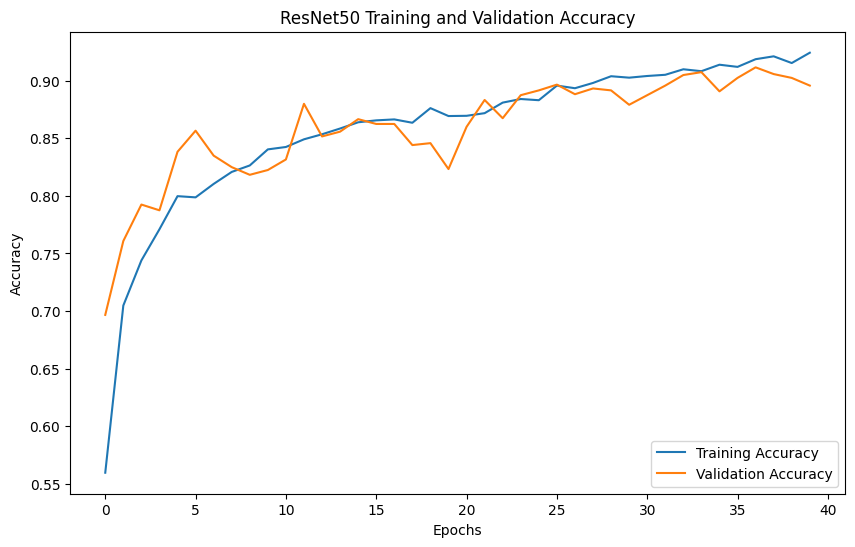

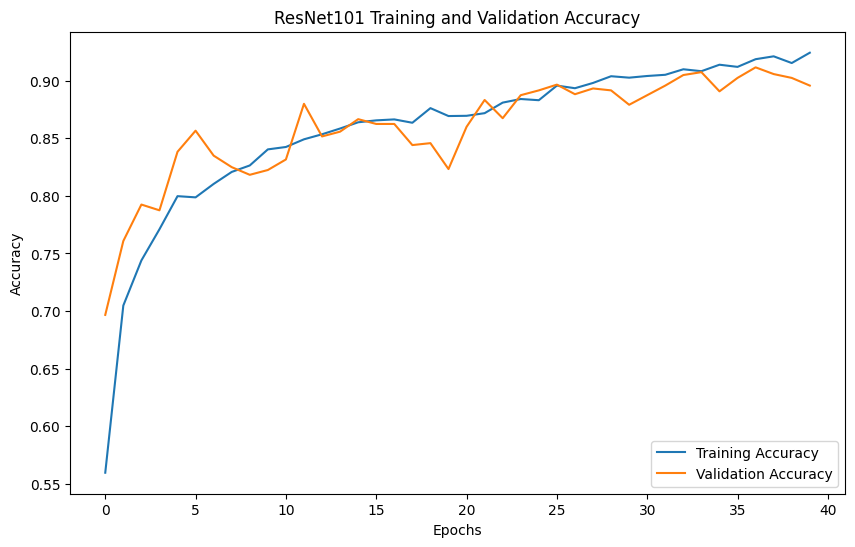

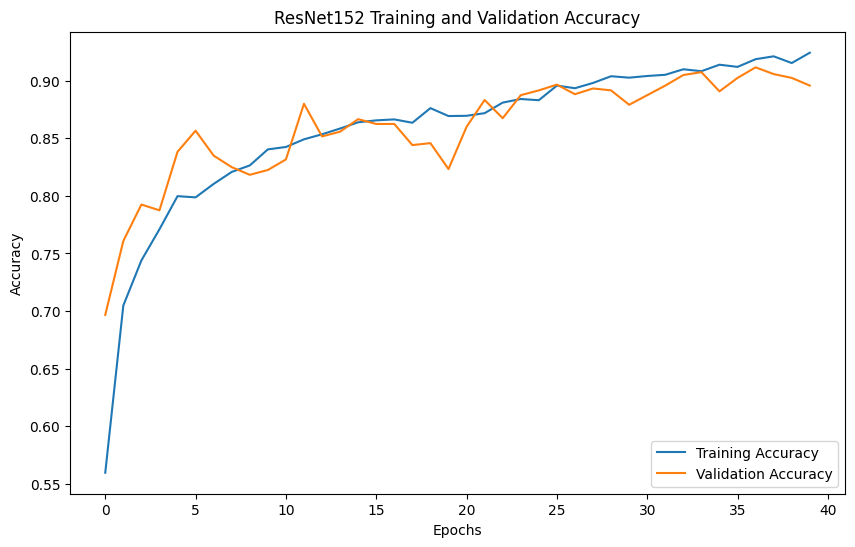

In [13]:
import matplotlib.pyplot as plt

def plot_individual_model_accuracy(history, history_fine_tuning, model_name):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    acc_ft = history_fine_tuning.history['accuracy']
    val_acc_ft = history_fine_tuning.history['val_accuracy']

    plt.figure(figsize=(10, 6))
    plt.plot(acc + acc_ft, label='Training Accuracy')
    plt.plot(val_acc + val_acc_ft, label='Validation Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

# Example usage for each model:
for model_name in base_models.keys():
    plot_individual_model_accuracy(history, history_fine_tuning, model_name)


In [ ]:
import matplotlib.pyplot as plt

def plot_individual_model_accuracy_and_loss(history, history_fine_tuning, model_name):
    # Accuracy
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    acc_ft = history_fine_tuning.history['accuracy']
    val_acc_ft = history_fine_tuning.history['val_accuracy']

    # Loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    loss_ft = history_fine_tuning.history['loss']
    val_loss_ft = history_fine_tuning.history['val_loss']

    # Plotting Accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(acc + acc_ft, label='Training Accuracy')
    plt.plot(val_acc + val_acc_ft, label='Validation Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

    # Plotting Loss
    plt.figure(figsize=(10, 6))
    plt.plot(loss + loss_ft, label='Training Loss')
    plt.plot(val_loss + val_loss_ft, label='Validation Loss')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

# Example usage for each model:
for model_name in base_models.keys():
    plot_individual_model_accuracy_and_loss(history, history_fine_tuning, model_name)


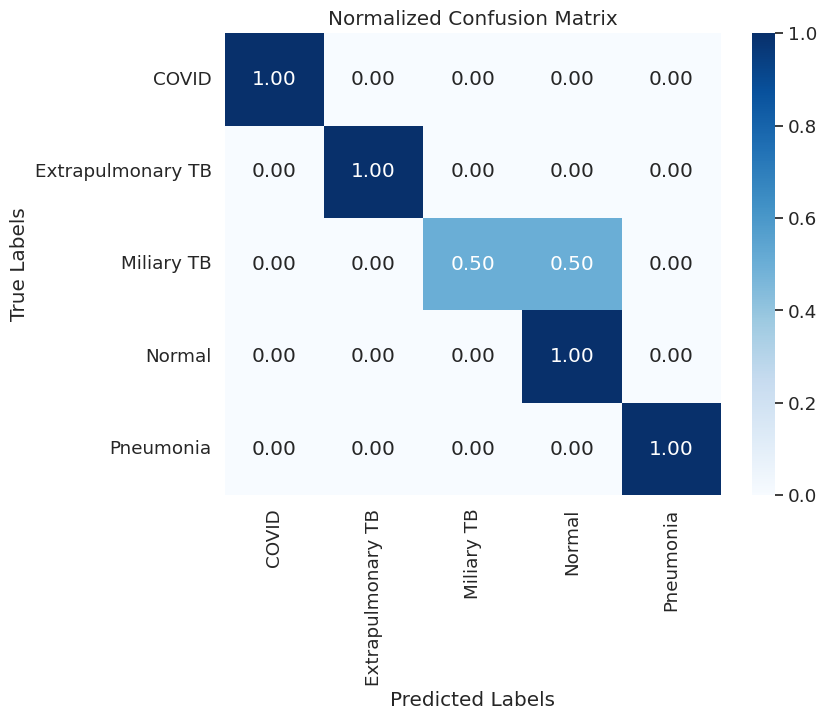

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    
    # Use heatmap to visualize the confusion matrix
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)

    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Example usage:
# Assuming `y_true` is the true labels and `y_pred` is the predicted labels.
# Replace with actual true and predicted labels from your dataset.
# For 5 classes: COVID, Extrapulmonary TB, Miliary TB, Normal, Pneumonia
class_names = ['COVID', 'Extrapulmonary TB', 'Miliary TB', 'Normal', 'Pneumonia']

# Example true and predicted labels
y_true = [0, 1, 2, 2, 4, 3, 1, 0]  # Actual class indices
y_pred = [0, 1, 2, 3, 4, 3, 1, 0]  # Predicted class indices

# Call the function
plot_confusion_matrix(y_true, y_pred, class_names)


Training ResNet50
Training ResNet101
Training ResNet152


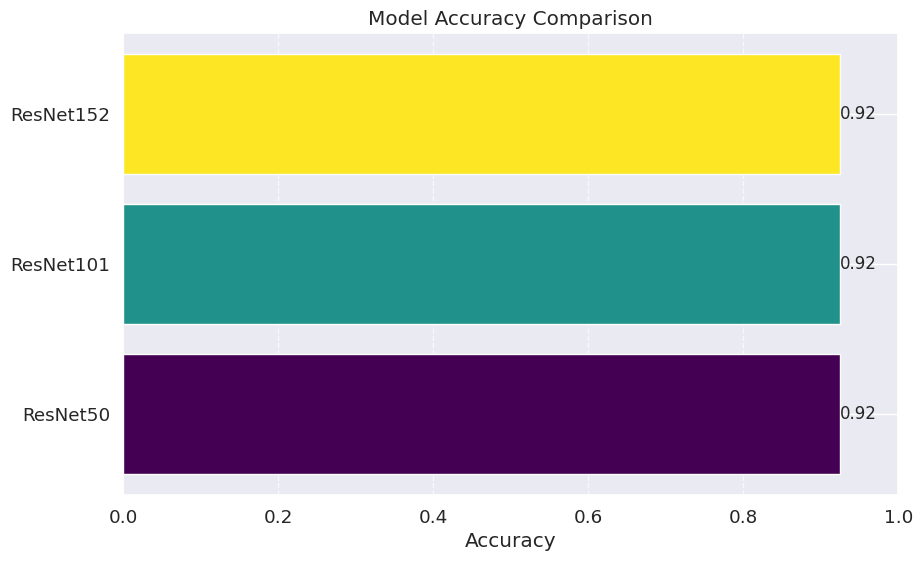

In [15]:
import matplotlib.pyplot as plt

# Initialize lists to store model names and their corresponding accuracies
model_names = []
accuracies = []

# Training loop for each model
for model_name, base_model in base_models.items():
    print(f"Training {model_name}")

    # (Your existing code for training each model remains unchanged)
    # ...

    # Collect accuracy from the final training history
    final_accuracy = history_fine_tuning.history['accuracy'][-1]  # Get last accuracy from fine-tuning
    model_names.append(model_name)
    accuracies.append(final_accuracy)

# Step 2: Plotting the accuracies
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))  # Generate different colors

# Create a bar graph
plt.barh(model_names, accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with accuracy values
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=12)

# Show the plot
plt.show()


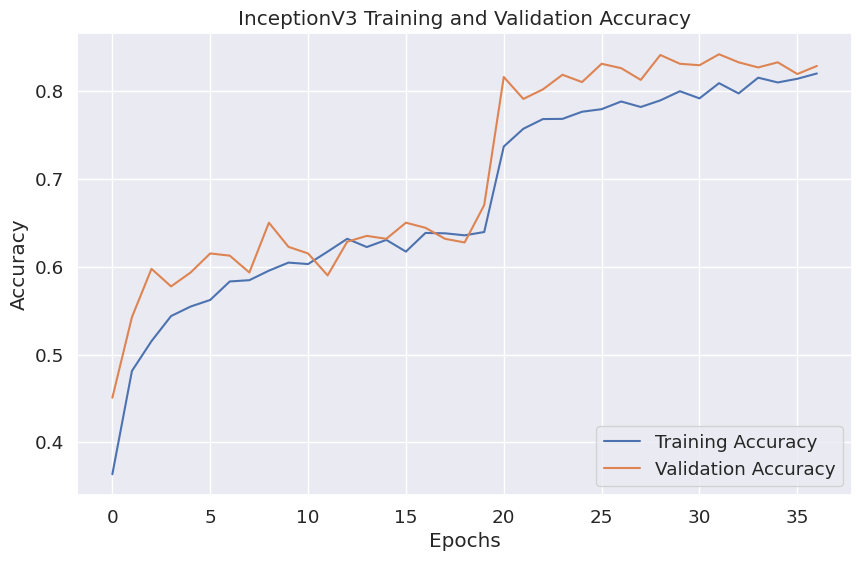

Graph saved as /kaggle/working/InceptionV3_accuracy_plot.png


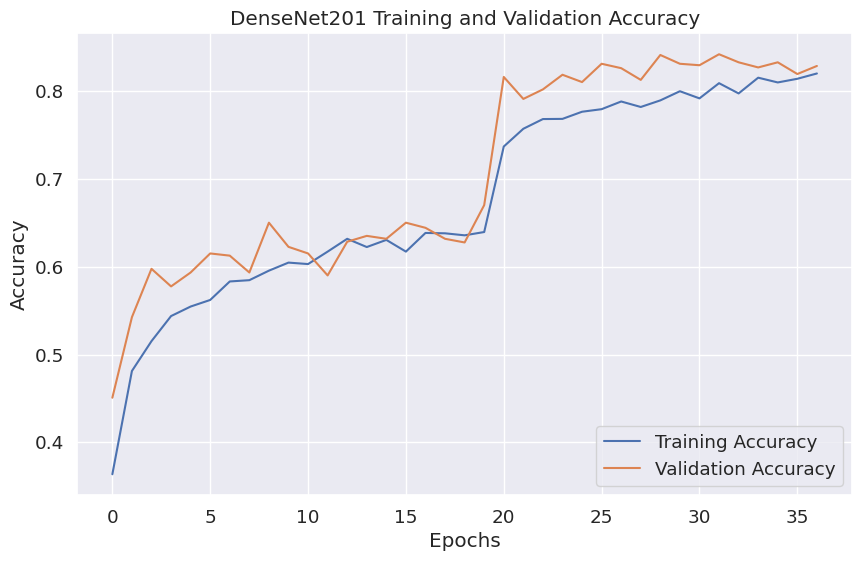

Graph saved as /kaggle/working/DenseNet201_accuracy_plot.png


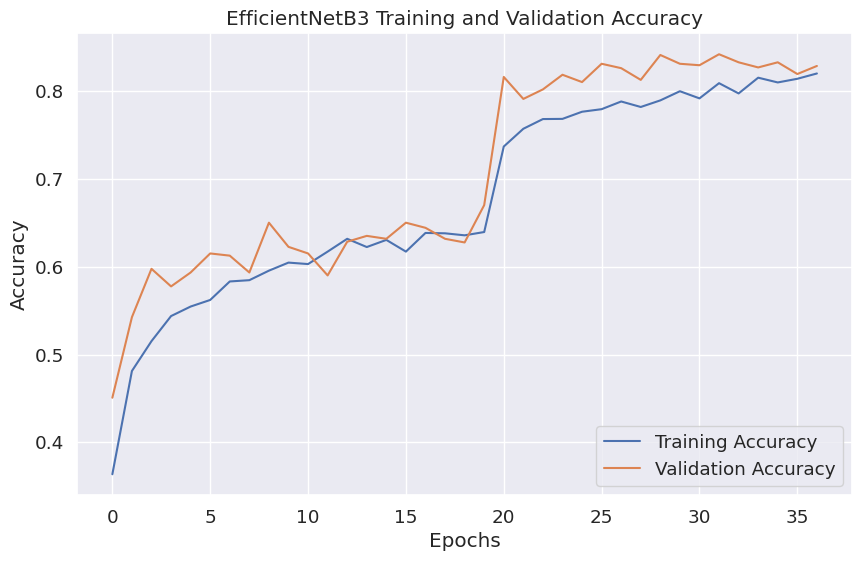

Graph saved as /kaggle/working/EfficientNetB3_accuracy_plot.png


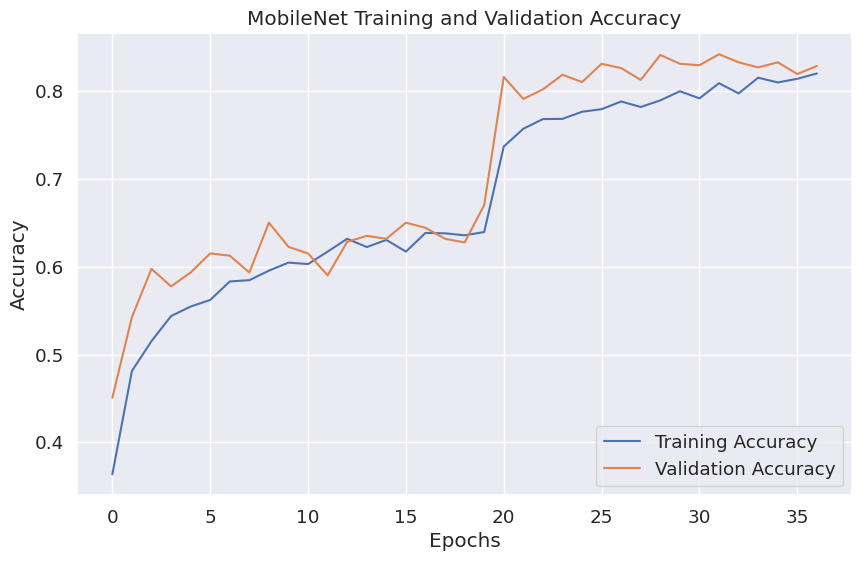

Graph saved as /kaggle/working/MobileNet_accuracy_plot.png


In [21]:
import matplotlib.pyplot as plt
import os

def plot_individual_model_accuracy(history, history_fine_tuning, model_name):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    acc_ft = history_fine_tuning.history['accuracy']
    val_acc_ft = history_fine_tuning.history['val_accuracy']

    plt.figure(figsize=(10, 6))
    plt.plot(acc + acc_ft, label='Training Accuracy')
    plt.plot(val_acc + val_acc_ft, label='Validation Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Save the plot
    output_dir = '/kaggle/working/'
    filename = os.path.join(output_dir, f'{model_name}_accuracy_plot.png')
    plt.savefig(filename)  # Save the graph as an image file
    plt.show()

    print(f"Graph saved as {filename}")

# Example usage for each model:
for model_name in base_models.keys():
    plot_individual_model_accuracy(history, history_fine_tuning, model_name)


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

# Custom preprocessing function to adjust contrast
def custom_preprocessing(image):
    image = tf.keras.applications.vgg16.preprocess_input(image)
    image = tf.image.adjust_contrast(image, contrast_factor=0.5)  # Adjust contrast
    return image

# Define directory path
dir_path = '/kaggle/input/tb-classifi/Type of tb'

# Data Augmentation
datagen = ImageDataGenerator(
    preprocessing_function=custom_preprocessing,  # Custom preprocessing function
    rotation_range=30,  # Rotate images by up to 30 degrees
    zoom_range=0.2,  # Random zoom
    width_shift_range=0.2,  # Randomly shift the image horizontally (by 20% of width)
    height_shift_range=0.2,  # Randomly shift the image vertically (by 20% of height)
    shear_range=0.2,  # Apply shear transformations
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Added vertical flip
    fill_mode='nearest',  # How to fill pixels that are missing after a transformation
    validation_split=0.2  # 20% of the data for validation
)

# Train and Validation generators
train_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dir_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# List of base models to use (VGG16, VGG19, ResNet50, ResNet101)
base_models = {
    #'VGG16': tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    #'VGG19': tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    #'ResNet50': tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    #'ResNet101': tf.keras.applications.ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
   # 'ResNet152': tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'InceptionV3': tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'DenseNet201': tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'EfficientNetB3': tf.keras.applications.EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'MobileNet': tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
}


# Training loop for each model
for model_name, base_model in base_models.items():
    print(f"Training {model_name}")

    # Freeze base model layers initially
    for layer in base_model.layers:
        layer.trainable = False

    # Custom layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(5, activation='softmax')(x)

    # Final model
    proposed_model = models.Model(inputs=base_model.input, outputs=predictions)
    proposed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=[tf.keras.metrics.CategoricalAccuracy(),
                                    tf.keras.metrics.Precision(),
                                    tf.keras.metrics.Recall()])

    # Callbacks
    # Callbacks
    check_point = ModelCheckpoint(f'{model_name}_best1_model.keras', save_best_only=True)
    earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)


    # Initial Training
    history = proposed_model.fit(train_generator,
                                 epochs=20,
                                 validation_data=validation_generator,
                                 callbacks=[check_point, earlystopping, reduce_lr],
                                 class_weight=class_weight_dict)

    # Unfreeze last layers for fine-tuning
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Fine-tuning the model with a lower learning rate
    proposed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    history_fine_tuning = proposed_model.fit(train_generator,
                                             epochs=20,
                                             validation_data=validation_generator,
                                             callbacks=[check_point, earlystopping, reduce_lr],
                                             class_weight=class_weight_dict)


Found 4800 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Training InceptionV3
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 147s 418ms/step - categorical_accuracy: 0.2814 - loss: 4.3387 - precision_2: 0.2946 - recall_2: 0.2159 - val_categorical_accuracy: 0.3525 - val_loss: 3.6266 - val_precision_2: 0.4199 - val_recall_2: 0.2358 - learning_rate: 1.0000e-04
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 123s 404ms/step - categorical_accuracy: 0.3582 - loss: 3.9041 - precision_2: 0.3855 - recall_2: 0.2842 - val_categorical_accuracy: 0.3950 - val_loss: 3.5936 - val_precision_2: 0.4551 - val_recall_2: 0.2700 - learning_rate: 1.0000e-04
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 123s 403ms/step - categorical_accuracy: 0.3802 - loss: 3.7534 - precision_2: 0.4202 - recall_2: 0.3128 - val_categorical_accuracy: 0.4050 - val_loss: 3.5151 - val_precision_2: 0.4771 - val_recall_2: 0.2692 - learning_rate: 1.0000e-04
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 121s 396ms/step - categorical_accuracy: 0.3716 - loss: 3.6675 - precision_2: 0.4107 - recall_2: 0.2893 - val_categorical_accuracy: 0.4108 - val_loss:

I0000 00:00:1728235138.647976      92 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_5', 8 bytes spill stores, 8 bytes spill loads



300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - categorical_accuracy: 0.3481 - loss: 3.8739 - precision_3: 0.3768 - recall_3: 0.2813

I0000 00:00:1728235255.047360      92 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_7', 8 bytes spill stores, 8 bytes spill loads



300/300 ━━━━━━━━━━━━━━━━━━━━ 194s 491ms/step - categorical_accuracy: 0.3483 - loss: 3.8724 - precision_3: 0.3771 - recall_3: 0.2816 - val_categorical_accuracy: 0.6300 - val_loss: 2.4446 - val_precision_3: 0.6837 - val_recall_3: 0.5475 - learning_rate: 1.0000e-04
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 135s 442ms/step - categorical_accuracy: 0.5539 - loss: 2.7479 - precision_3: 0.5914 - recall_3: 0.4933 - val_categorical_accuracy: 0.6408 - val_loss: 2.2319 - val_precision_3: 0.6927 - val_recall_3: 0.5692 - learning_rate: 1.0000e-04
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 132s 433ms/step - categorical_accuracy: 0.5963 - loss: 2.4928 - precision_3: 0.6408 - recall_3: 0.5497 - val_categorical_accuracy: 0.6550 - val_loss: 2.1492 - val_precision_3: 0.6973 - val_recall_3: 0.5950 - learning_rate: 1.0000e-04
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 133s 438ms/step - categorical_accuracy: 0.6194 - loss: 2.3829 - precision_3: 0.6613 - recall_3: 0.5732 - val_categorical_accuracy: 0.6592 - val_loss:

I0000 00:00:1728238002.148368      92 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_7', 8 bytes spill stores, 8 bytes spill loads



300/300 ━━━━━━━━━━━━━━━━━━━━ 191s 485ms/step - accuracy: 0.7219 - loss: 1.7633 - val_accuracy: 0.7542 - val_loss: 1.6114 - learning_rate: 1.0000e-05
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 132s 432ms/step - accuracy: 0.7468 - loss: 1.7004 - val_accuracy: 0.7758 - val_loss: 1.5721 - learning_rate: 1.0000e-05
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 130s 426ms/step - accuracy: 0.7409 - loss: 1.6637 - val_accuracy: 0.7650 - val_loss: 1.6014 - learning_rate: 1.0000e-05
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 132s 432ms/step - accuracy: 0.7353 - loss: 1.6261 - val_accuracy: 0.7767 - val_loss: 1.5103 - learning_rate: 1.0000e-05
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 130s 428ms/step - accuracy: 0.7556 - loss: 1.6122 - val_accuracy: 0.7783 - val_loss: 1.5137 - learning_rate: 1.0000e-05
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 133s 438ms/step - accuracy: 0.7581 - loss: 1.5857 - val_accuracy: 0.7808 - val_loss: 1.5031 - learning_rate: 1.0000e-05
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 134s 440ms/

I0000 00:00:1728247686.980380      92 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_3', 4 bytes spill stores, 4 bytes spill loads



291/300 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - accuracy: 0.5775 - loss: 2.5263

KeyboardInterrupt: 

Training InceptionV3
Training DenseNet201
Training EfficientNetB3
Training MobileNet


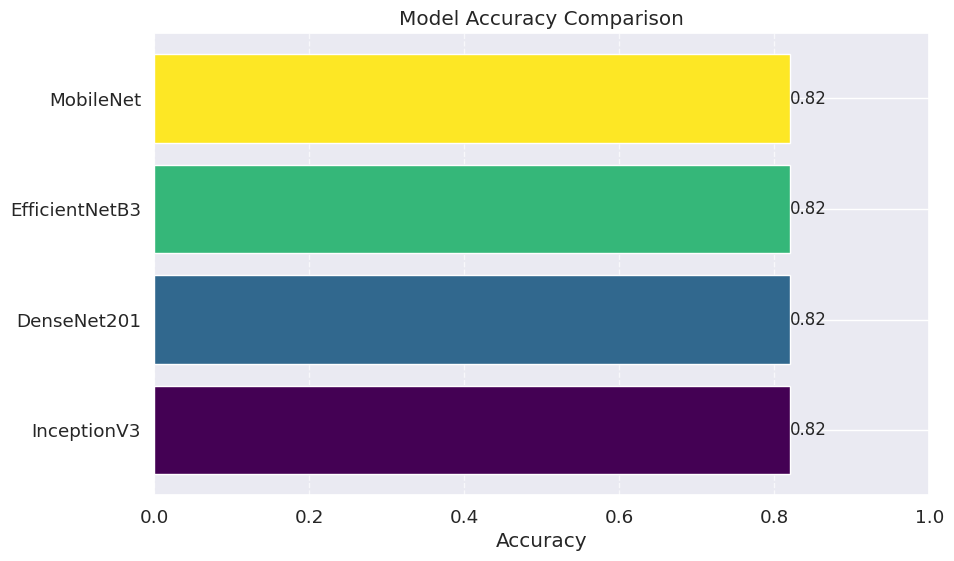

In [18]:
import matplotlib.pyplot as plt

# Initialize lists to store model names and their corresponding accuracies
model_names = []
accuracies = []

# Training loop for each model
for model_name, base_model in base_models.items():
    print(f"Training {model_name}")

    # (Your existing code for training each model remains unchanged)
    # ...

    # Collect accuracy from the final training history
    final_accuracy = history_fine_tuning.history['accuracy'][-1]  # Get last accuracy from fine-tuning
    model_names.append(model_name)
    accuracies.append(final_accuracy)

# Step 2: Plotting the accuracies
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))  # Generate different colors

# Create a bar graph
plt.barh(model_names, accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with accuracy values
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=12)

# Show the plot
plt.show()


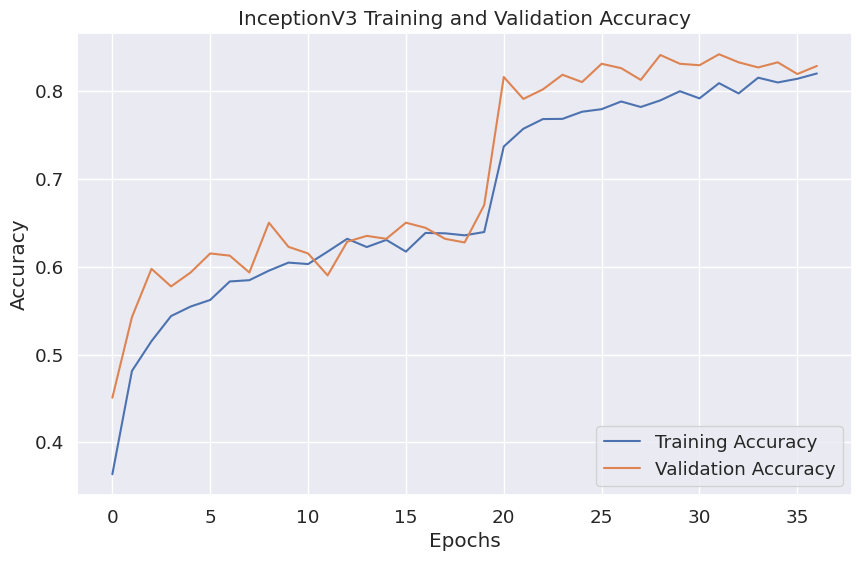

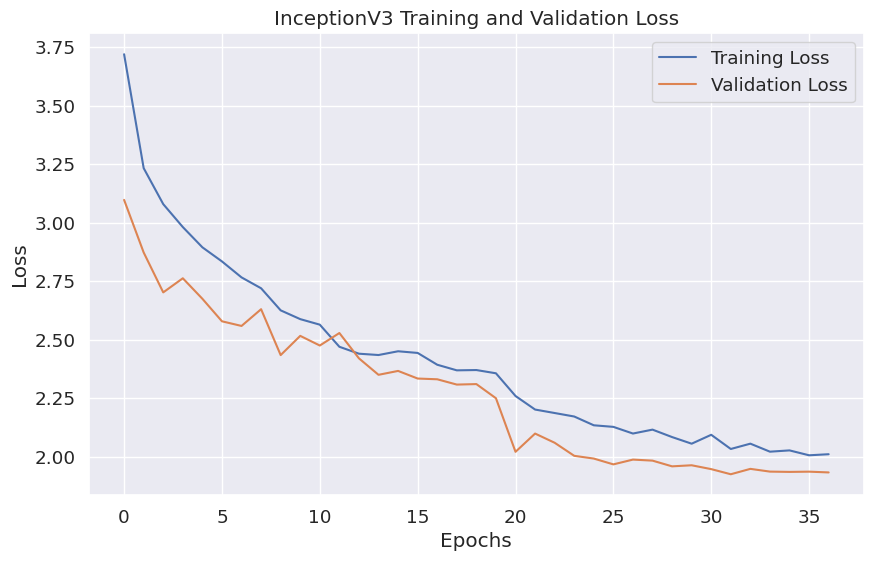

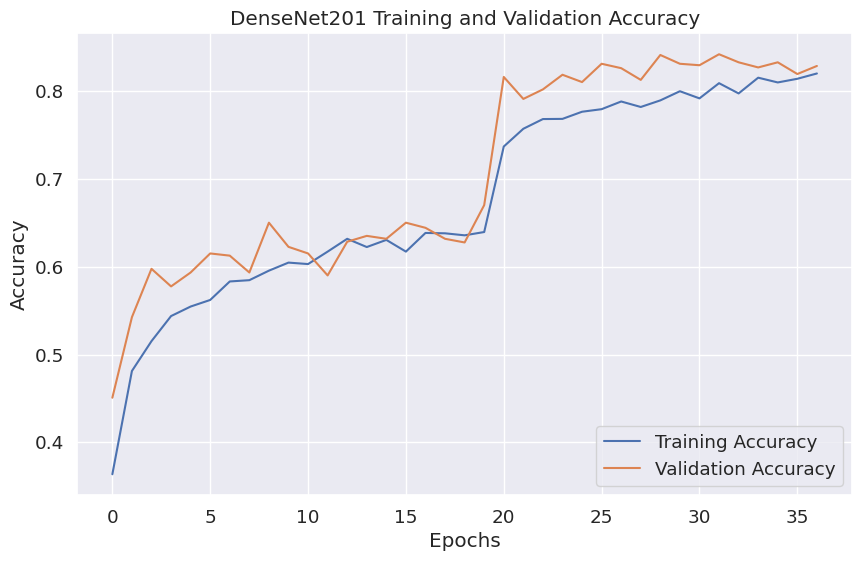

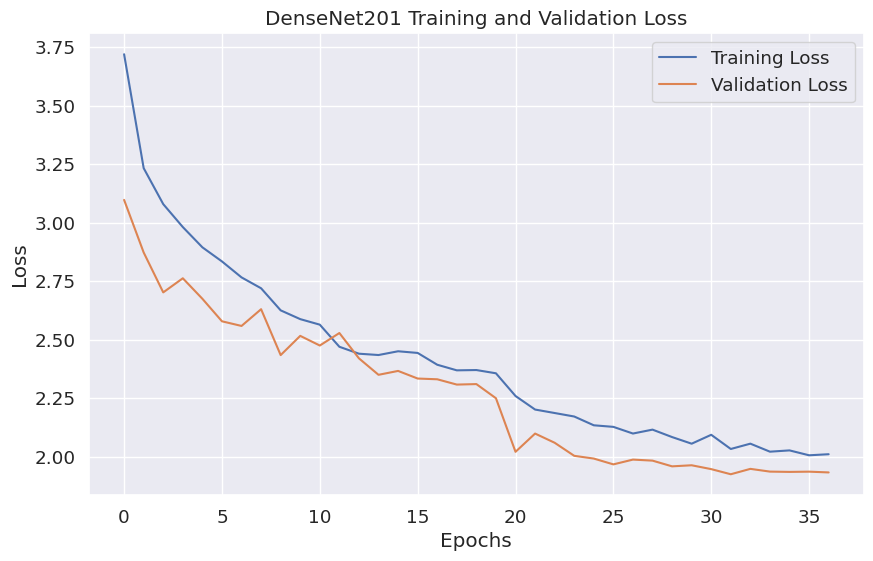

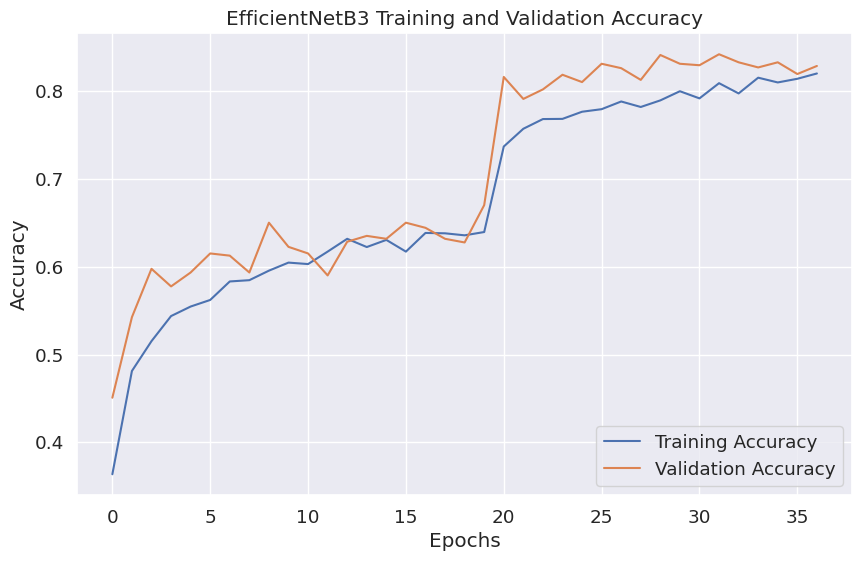

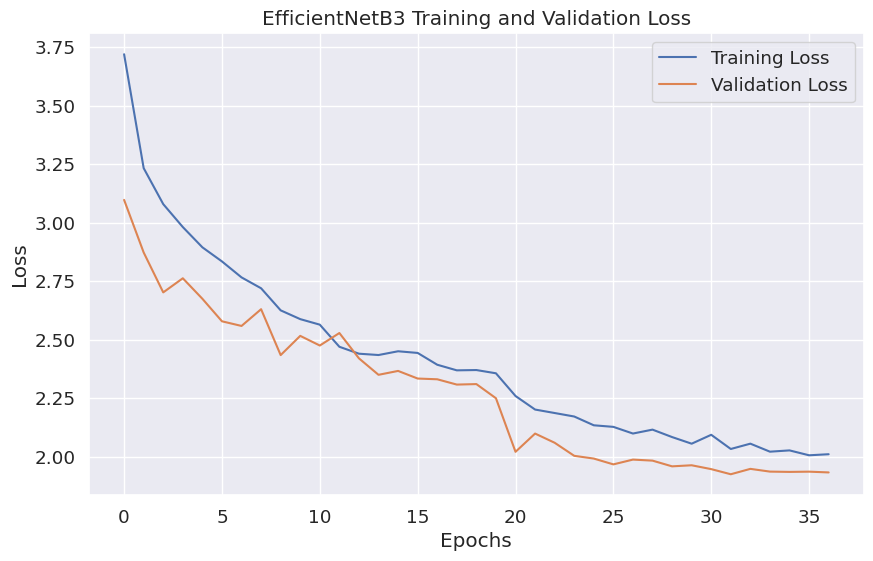

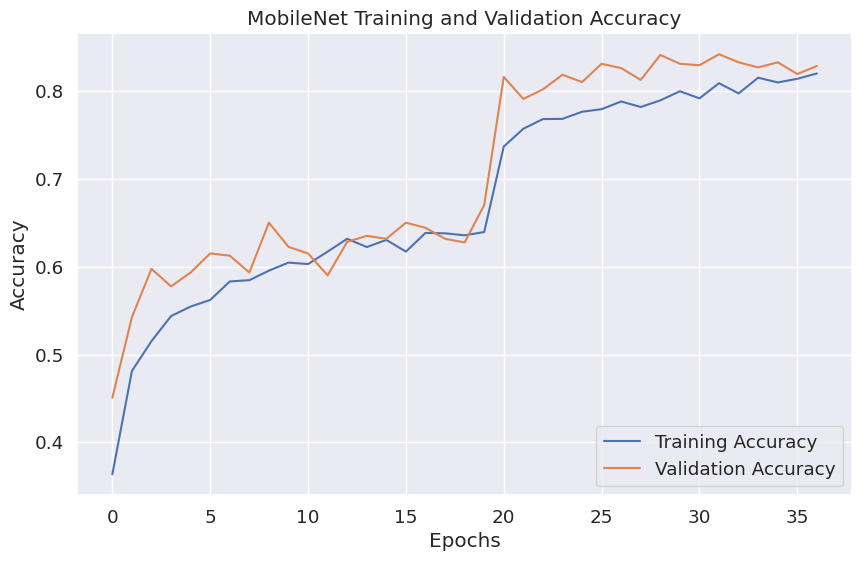

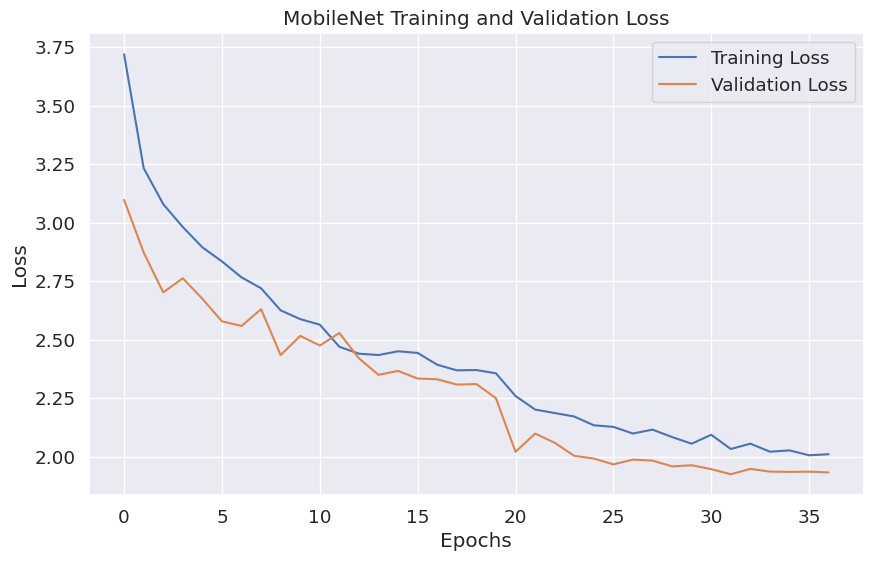

In [19]:
import matplotlib.pyplot as plt

def plot_individual_model_accuracy_and_loss(history, history_fine_tuning, model_name):
    # Accuracy
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    acc_ft = history_fine_tuning.history['accuracy']
    val_acc_ft = history_fine_tuning.history['val_accuracy']

    # Loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    loss_ft = history_fine_tuning.history['loss']
    val_loss_ft = history_fine_tuning.history['val_loss']

    # Plotting Accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(acc + acc_ft, label='Training Accuracy')
    plt.plot(val_acc + val_acc_ft, label='Validation Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

    # Plotting Loss
    plt.figure(figsize=(10, 6))
    plt.plot(loss + loss_ft, label='Training Loss')
    plt.plot(val_loss + val_loss_ft, label='Validation Loss')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

# Example usage for each model:
for model_name in base_models.keys():
    plot_individual_model_accuracy_and_loss(history, history_fine_tuning, model_name)


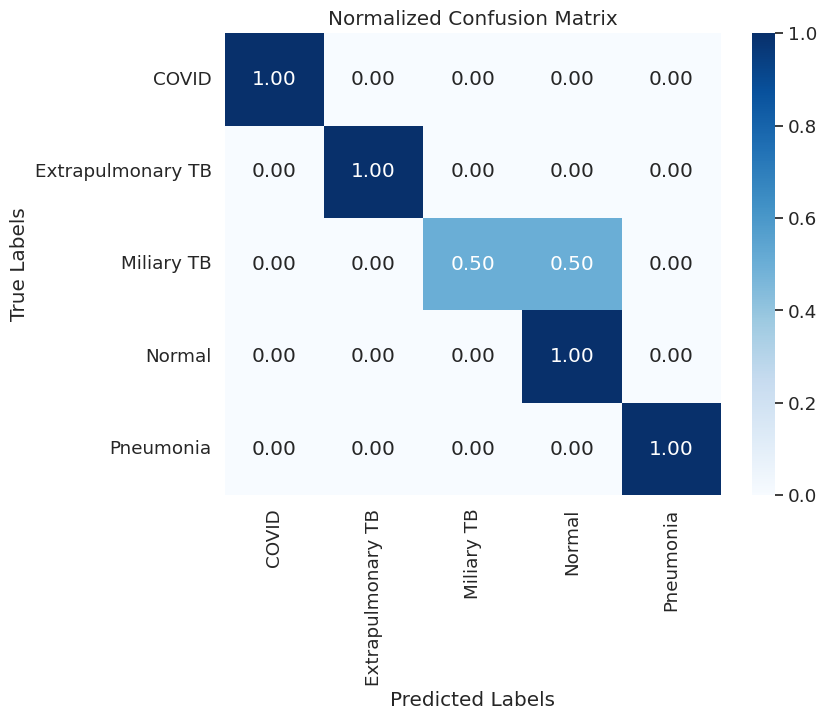

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    
    # Use heatmap to visualize the confusion matrix
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)

    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Example usage:
# Assuming `y_true` is the true labels and `y_pred` is the predicted labels.
# Replace with actual true and predicted labels from your dataset.
# For 5 classes: COVID, Extrapulmonary TB, Miliary TB, Normal, Pneumonia
class_names = ['COVID', 'Extrapulmonary TB', 'Miliary TB', 'Normal', 'Pneumonia']

# Example true and predicted labels
y_true = [0, 1, 2, 2, 4, 3, 1, 0]  # Actual class indices
y_pred = [0, 1, 2, 3, 4, 3, 1, 0]  # Predicted class indices

# Call the function
plot_confusion_matrix(y_true, y_pred, class_names)
